In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
from bertopic import BERTopic
from wordcloud import WordCloud

C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distanc

In [2]:
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/cleanedAggregateData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.012997627258300781
{'id': 'EJ959619', 'title': 'Can Synchronous Computer-Mediated Communication (CMC) Help Beginning-Level Foreign Language Learners Speak?', 'author': 'Ko, Chao-Jung', 'description': "This study investigated the possibility that initial-level learners may acquire oral skills through synchronous computer-mediated communication (SCMC). Twelve Taiwanese French as a foreign language (FFL) students, divided into three groups, were required to conduct a variety of tasks in one of the three learning environments (video/audio, audio, and face-to-face (f2f)) over 18 weeks. The participants' performance in three oral tests was compared to see if they had developed oral skills in the three environments. The other data such as their online chat records, interview transcriptions, learning journals, and the instructor's observation journal provided further information about how they developed oral skills in their learning envir

In [3]:
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.004000663757324219


In [4]:
model = BERTopic(verbose=True, embedding_model="all-MiniLM-L6-v2")
#embeddingmodel embedding_model="all-MiniLM-L6-v2" or embedding_mode="all-mpnet-base-v2"
docs = df.title.to_list()
pub_dates = df.publicationdateyear.to_list()
topics, probabilities = model.fit_transform(docs)
topics_over_time = model.topics_over_time(docs, pub_dates)
model.get_topic_info()

Batches: 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]
2023-05-16 16:09:20,887 - BERTopic - Transformed documents to Embeddings
2023-05-16 16:09:30,026 - BERTopic - Reduced dimensionality
2023-05-16 16:09:30,073 - BERTopic - Clustered reduced embeddings
12it [00:00, 41.02it/s]


,Topic,Count,Name
0,-1,293,-1_of_in_and_the
1,0,111,0_language_technology_learning_mobile
2,1,85,1_vocabulary_comprehension_reading_listening
3,2,52,2_feedback_writing_corrective_efl
4,3,46,3_corpus_dictionaries_corpora_the
5,4,41,4_collaborative_writing_l2_wiki
6,5,35,5_call_research_the_of
7,6,34,6_online_informal_language_learning
8,7,32,7_game_games_digital_gaming
9,8,31,8_pronunciation_training_asr_feedback


In [5]:
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

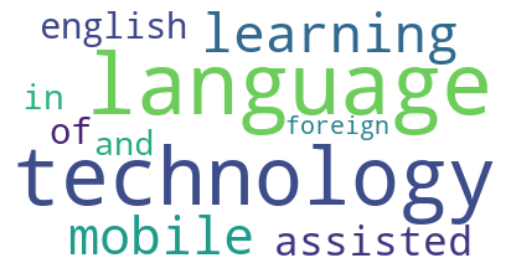

In [7]:
create_wordcloud(model, topic=0)

In [8]:
model.visualize_topics()

In [9]:
topics_to_include = list(range(0, 22))
model.visualize_barchart(topics= topics_to_include, width=300)

In [10]:
model.visualize_hierarchy()

In [11]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 21/21 [00:00<00:00, 325.40it/s]


In [12]:
model.visualize_heatmap()

In [14]:
model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [15]:
model.visualize_topics_over_time(topics_over_time, topics=[12, 13, 14, 15, 16, 17, 18, 19, 20, 21])


In [16]:
model.visualize_topics_over_time(topics_over_time, topics=[])
#COVID-19 Topic


In [17]:
model.visualize_topics_over_time(topics_over_time)